In [151]:
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
import astropy.units as u
from astropy.coordinates import EarthLocation
from pytz import timezone
from astroplan import Observer
from astropy.time import Time
import numpy as np
import astropy.units as u
import seaborn as sns
sns.set(font="times",font_scale=1.5,style="ticks")

from astroplan.plots import plot_sky
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt
import astroplan

In [155]:
observer = Observer(longitude=139.7414*u.deg, latitude=35.6581*u.deg,
                  elevation=5*u.m, name="ISAS", timezone="Japan")

coordinates = SkyCoord('17h45m39.6s', '-29d00m22.0s', frame='icrs') # (l,b=(0,0))
GB = FixedTarget(name='GB', coord=coordinates)
coordinates = SkyCoord("23h06m29.368s","−05d02m29.04s")
TRAPPIST1 = FixedTarget(name='TRAPPIST1', coord=coordinates)
coordinates = SkyCoord("00h44m59.31s","−15d16m16.7s")
LHS1140 = FixedTarget(name='LHS1140', coord=coordinates)
NGC3532 = FixedTarget.from_name("NGC3532")
NGC2168 = FixedTarget.from_name("NGC2168")
NGC2099 = FixedTarget.from_name("NGC2099")

In [156]:
observer = Observer(longitude=139.7414*u.deg, latitude=35.6581*u.deg,
                  elevation=5*u.m, name="ISAS", timezone="Japan")
#observer = Observer.at_site("SAAO")
time = Time('2023-01-01 00:00:00') + np.arange(0,365,1)*u.day + 9*u.hour # UTC
GB_data      = observer.altaz(time=time,target=GB)
NGC3532_data = observer.altaz(time=time,target=NGC3532)
NGC2168_data = observer.altaz(time=time,target=NGC2168)
NGC2099_data = observer.altaz(time=time,target=NGC2099)
#plt.plot(time.jd,)
#plt.plot(time.jd,)

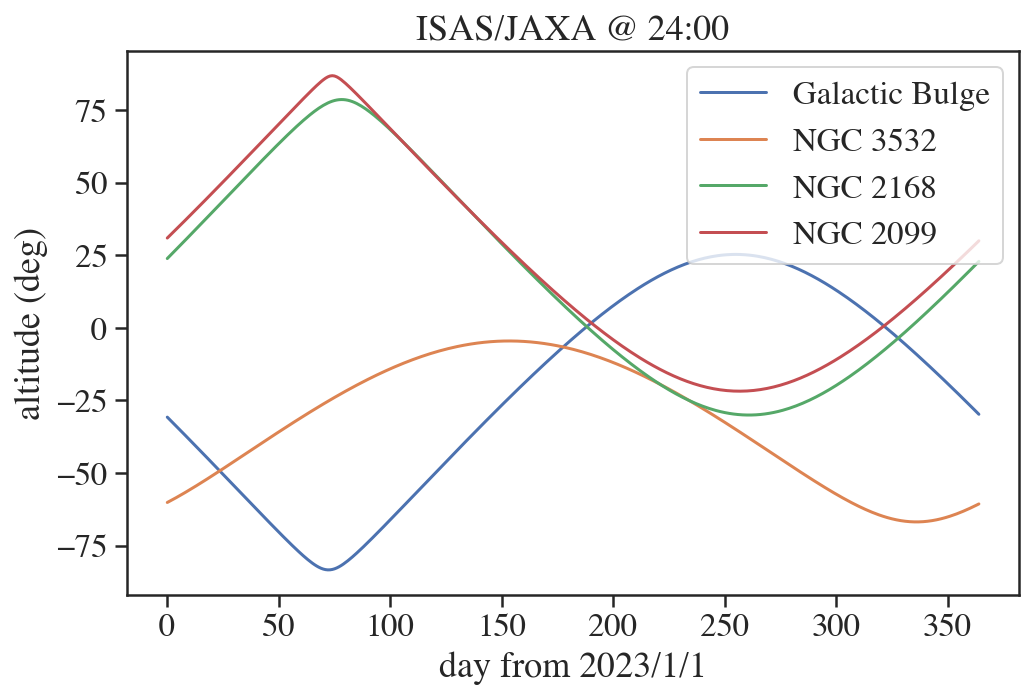

In [157]:
plt.figure(figsize=(8,5))
plt.title("ISAS/JAXA @ 24:00")
plt.plot(GB_data.alt.deg,"-",alpha=1,label="Galactic Bulge")
plt.plot(NGC3532_data.alt.deg,"-",alpha=1,label="NGC 3532")
plt.plot(NGC2168_data.alt.deg,"-",alpha=1,label="NGC 2168")
plt.plot(NGC2099_data.alt.deg,"-",alpha=1,label="NGC 2099")
plt.xlabel("day from 2023/1/1")
plt.ylabel("altitude (deg)")
plt.legend()
plt.show()

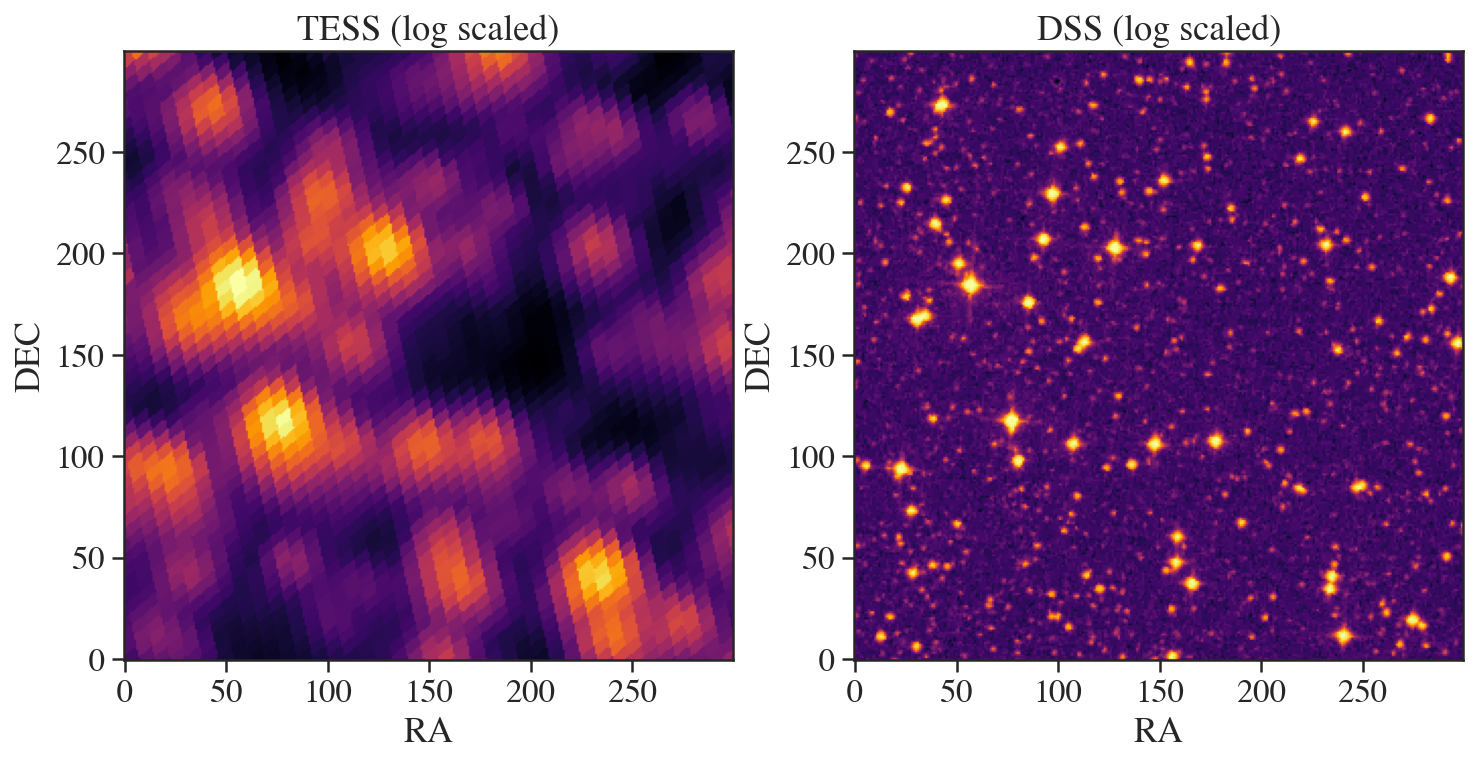

In [229]:
from astroplan.plots import plot_finder_image
from astroplan import FixedTarget
import matplotlib.pyplot as plt
messier1 = FixedTarget.from_name("NGC3532") 
fig,ax=plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(wspace=0.2)
plot_finder_image(messier1,style_kwargs={"cmap":"inferno"},ax=ax[0],
                            fov_radius=10*u.arcmin,survey="TESS",log=True) 
plot_finder_image(messier1,style_kwargs={"cmap":"inferno"},ax=ax[1],
                            fov_radius=10*u.arcmin,survey="DSS",log=True)
ax[0].set_title("TESS (log scaled)")
ax[1].set_title("DSS (log scaled)")
plt.show()